# Statistiche CalenPIario

https://www.rimosco.it/picalendar/index.php?a=list

In [1]:
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
import numpy as np
import datetime

now = str(datetime.datetime.now())[:16]

In [2]:
url = 'https://www.rimosco.it/picalendar/index.php?a=list'

r = requests.get(url)
pical_problems = BeautifulSoup(r.text, 'html.parser')

# page format updated on 2022-04-16

data = [ [l.split(" (Risolto ")[0],int(l.split(" (Risolto ")[1])] 
        for l in pical_problems.text.split("\n")[22].split(" volte)")[:-1] ]
labels = [ l[0] for l in np.array(data)[:,0:1] ]
values = [ int(l[0]) for l in np.array(data)[:,1:] ]

#labels,values

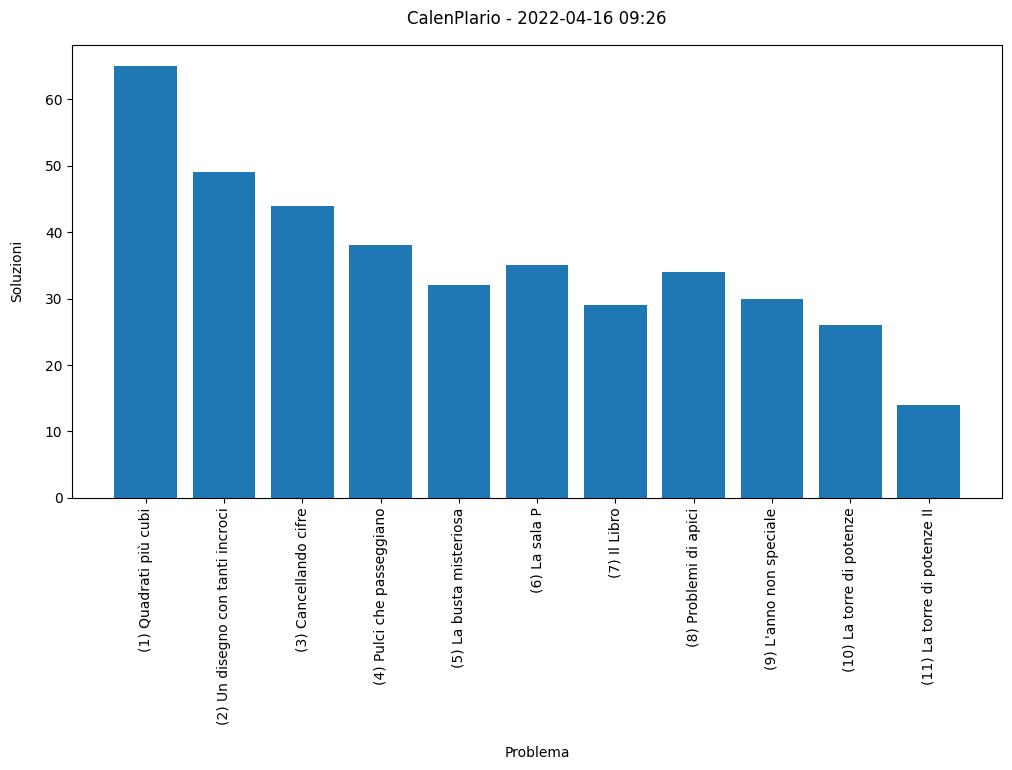

In [3]:
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
plt.bar(labels,values)
plt.xticks(range(len(labels)), labels, rotation='vertical')
ax.set_xlabel('Problema', labelpad=15)
ax.set_ylabel('Soluzioni', labelpad=15)
ax.set_title('CalenPIario - {}'.format(now), pad=15)
plt.show()

In [4]:
url = 'https://www.rimosco.it/picalendar/index.php?a=highscore'

r = requests.get(url)
pical_highscore = BeautifulSoup(r.text, 'html.parser')

table = str(pical_highscore.find_all("table")[0])
table = table.replace("<table><tr><td>Punteggio</td><td>Nickname</td></tr><tr>","").replace("</tr></table>","")
table = [ [ i.replace('<td>','').replace('</td>','') for i in l.split("</td><td>") ] for l in table.split("</tr><tr>") ]

# minimal score cut
pmin = 0

# table format updated on 2022-04-05
points = []
names  = []
solved = []
for l in table:
    p = l[0]
    if len(l[0])>202:
        p = l[0][202:]
    values = p.replace(' class="tg-svo0"','').replace(' class="tg-c3ow"','')
    values = values.replace('</tr></tbody></table>','')
    values = values.split("<td>")
    name  = values[2]
    point = values[4]
    solve = values[3]
    if int(point)>pmin:
        points.append(int(point))
        names.append(name)
        solved.append(int(solve))

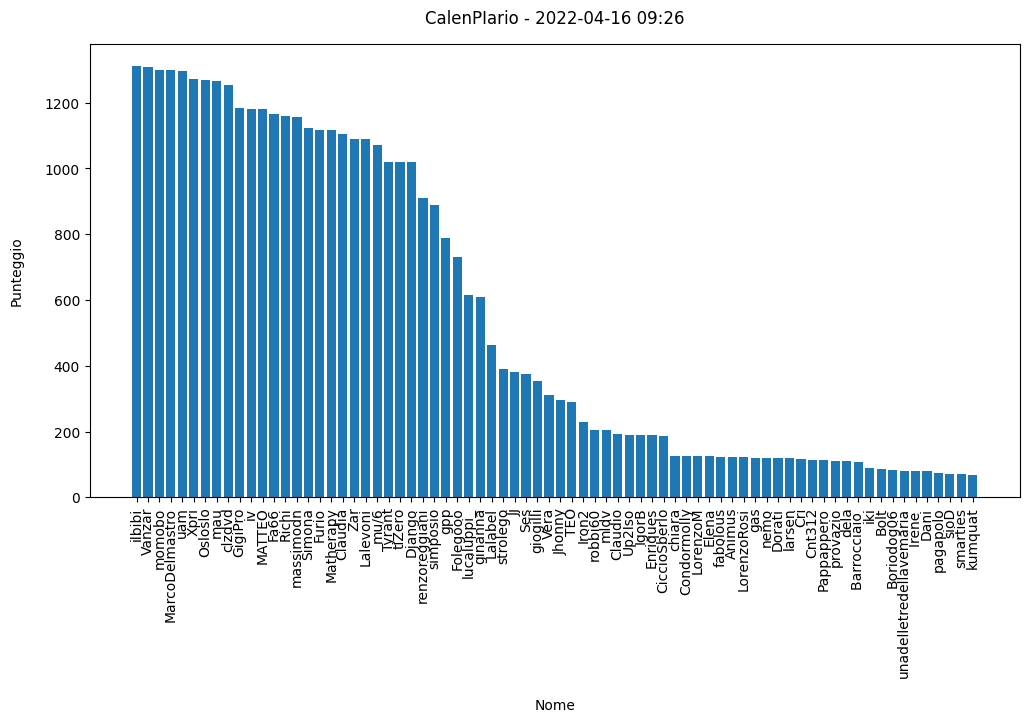

In [5]:
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
plt.bar(names,points)
plt.xticks(range(len(names)), names, rotation='vertical')
ax.set_xlabel('Nome', labelpad=15)
ax.set_ylabel('Punteggio', labelpad=15)
ax.set_title('CalenPIario - {}'.format(now), pad=15)
plt.show()

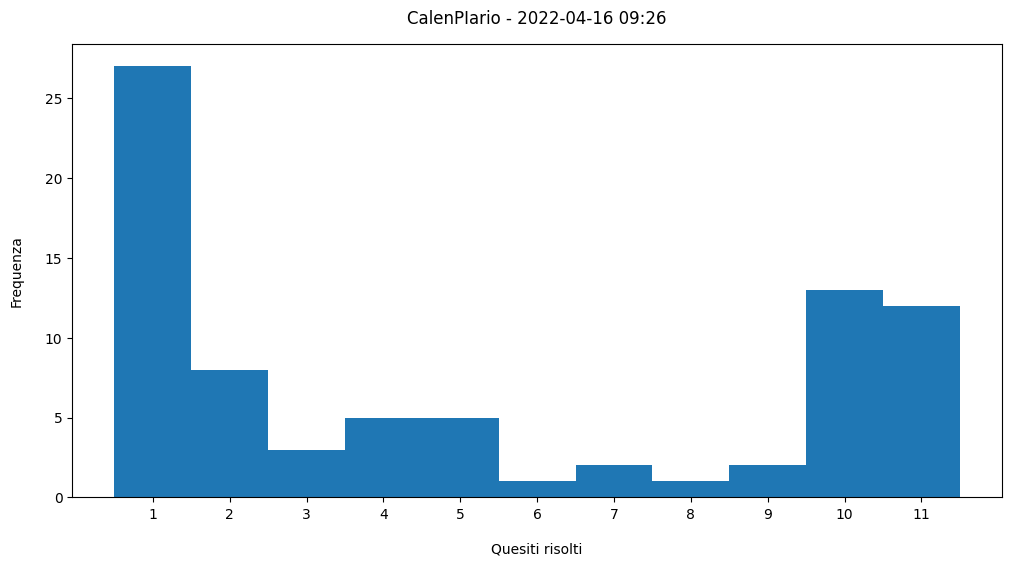

In [6]:
from collections import Counter

solved_shift = [ s-0.5 for s in solved ]
count = Counter(solved_shift)
bins = sorted(list(count.keys()))
bins = bins+[bins[-1]+1]

fig, ax = plt.subplots(figsize=(12,6),dpi=100)

plt.hist(solved_shift,bins=bins)

plt.xticks(np.arange(1, max(solved)+1, 1.0))
ax.set_xlabel('Quesiti risolti', labelpad=15)
ax.set_ylabel('Frequenza', labelpad=15)
ax.set_title('CalenPIario - {}'.format(now), pad=15)
plt.show()